In [1]:
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymysql

In [32]:
def regression_svm(
    x_train, y_train, x_test, y_test, C, Gamma):
    '''
        Estimate a SVM regressor
    '''
    # create the regressor object
    svm = SVR(kernel='rbf', C = C, gamma = Gamma)
    # estimate the model
    svm.fit(x_train,y_train)
    predict_y = svm.predict(x_test)

    # decision function
    #decision_values = svm.decision_function(x_test)

    # return the object
    #return mt.roc_auc(y_test, decision_values)
    return svm.score(x_test, y_test)

In [22]:
df = pd.read_csv("C:/Users/user/OneDrive/桌面/Air/AQI_hour (2021_06-11).csv")
df1 = df.loc[(df["SiteName"] == "桃園"), :]
df2 = df1.dropna()
X = df2.iloc[:,[3,4,5,8,9,10,11,12]]
y_pm25 = df2.iloc[:,7]
y_pm10 = df2.iloc[:,6]
X_train, X_test, y_train, y_test = train_test_split(X, y_pm25, test_size = 0.3)

In [33]:
regression_svm(X_train, y_train, X_test, y_test, 1e3, "auto")

0.11252254219108171

In [47]:
from __future__ import division
import time
import numpy as np
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
 
# 設定 seed
rng = np.random.RandomState(0)
 
# 訓練資料
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
 
# 加入 noise
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
 
# 畫圖的資料，新增二維維度
X_plot = np.linspace(0, 5, 100000)[:, None]
 
# 訓練大小
train_size = 1000

In [48]:
# model
svr = SVR(kernel='rbf', gamma=0.1, epsilon=0.1)
krr = KernelRidge(kernel='rbf', gamma=0.1)
 
# 計算 SVR 訓練時間
t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s" % svr_fit)
 
# 計算 SVR 預測時間
t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s" % (X_plot.shape[0], svr_predict))
 
# SVR 的 support vector
sv_ind = svr.support_

# model
svr = SVR(kernel='rbf', C=1e1, gamma=0.1, epsilon=0.1)
krr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)

SVR complexity and bandwidth selected and model fitted in 0.033 s
SVR prediction for 100000 inputs in 2.079 s


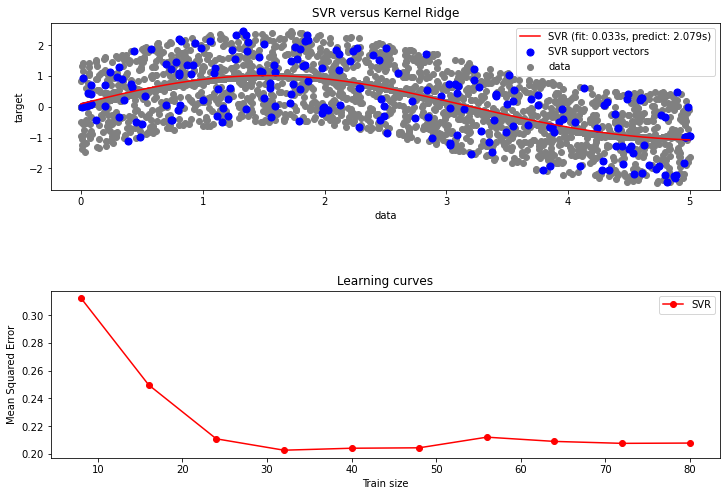

In [52]:
plt.rcParams["figure.figsize"] = (12,8)
plt.subplot(2,1,1)
# 畫出 SV
plt.scatter(X[sv_ind], y[sv_ind], c="b", s=50, label='SVR support vectors', zorder=2)
# 畫出 data
plt.scatter(X[:], y[:], c='gray', label='data', zorder=1)
# 畫出 SVR 的曲線
plt.plot(X_plot, y_svr, c='r', label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()
 
# Visualize learning curves
plt.subplot(2,1,2)
 
# cv = cross-validation，5 表示五份
train_sizes, train_scores_svr, test_scores_svr = learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                                                                scoring="neg_mean_squared_error", cv=5)
plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r", label="SVR")

plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")
 
# 調整之間的空白高度
plt.subplots_adjust(hspace=0.6)
plt.show()

In [ ]:
from __future__ import division
import time
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
 
rng = np.random.RandomState(0)
 
#############################################################################
# 生成随机数据
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
 
# 在标签中对每50个结果标签添加噪声
 
y[::50] += 2 * (0.5 - rng.rand(int(X.shape[0]/50)))
 
X_plot = np.linspace(0, 5, 100000)[:, None]
 
#############################################################################
# 训练SVR模型
 
#训练规模
train_size = 100
#初始化SVR
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
#记录训练时间
t0 = time.time()
#训练
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
 
t0 = time.time()
#测试
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0

In [ ]:
#############################################################################
# 对结果进行显示
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1)
plt.hold('on')
plt.plot(X_plot, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
 
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()
 
plt.figure()

In [ ]:
##############################################################################
# 对训练和测试的过程耗时进行可视化
X = 5 * rng.rand(1000000, 1)
y = np.sin(X).ravel()
y[::50] += 2 * (0.5 - rng.rand(int(X.shape[0]/50)))
sizes = np.logspace(1, 4, 7)
for name, estimator in {
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:int(train_test_size)], y[:int(train_test_size)])
        train_time.append(time.time() - t0)
 
        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)
 
    plt.plot(sizes, train_time, 'o-', color="b" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)
 
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

In [ ]:
################################################################################
# 对学习过程进行可视化
plt.figure()
 
svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
 
plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
 
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")
 
plt.show()